In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the data file
data=pd.read_csv(r'C:\Users\mehak\GitHub\datasets\HELP group\Country-data.csv')

## Lets Explore the Dataset

In [3]:
data.shape

(167, 10)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<Axes: >

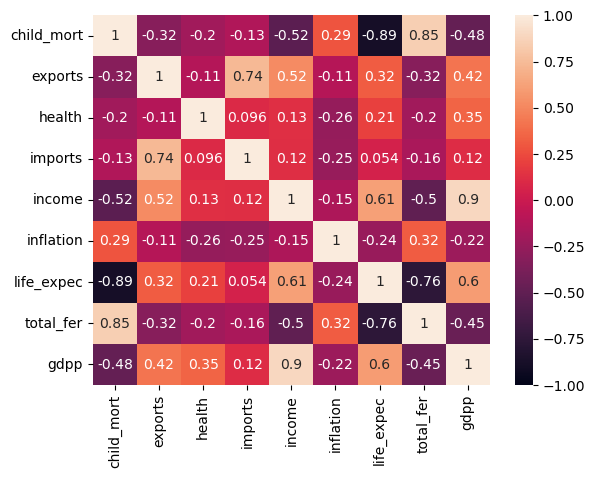

In [5]:
#Correlation heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1)

## Visualize the data

In [6]:
#Before we begin visualization, lets convert country to index as it is a redundant column.
data.set_index('country', inplace=True)
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


## Univariate Analysis

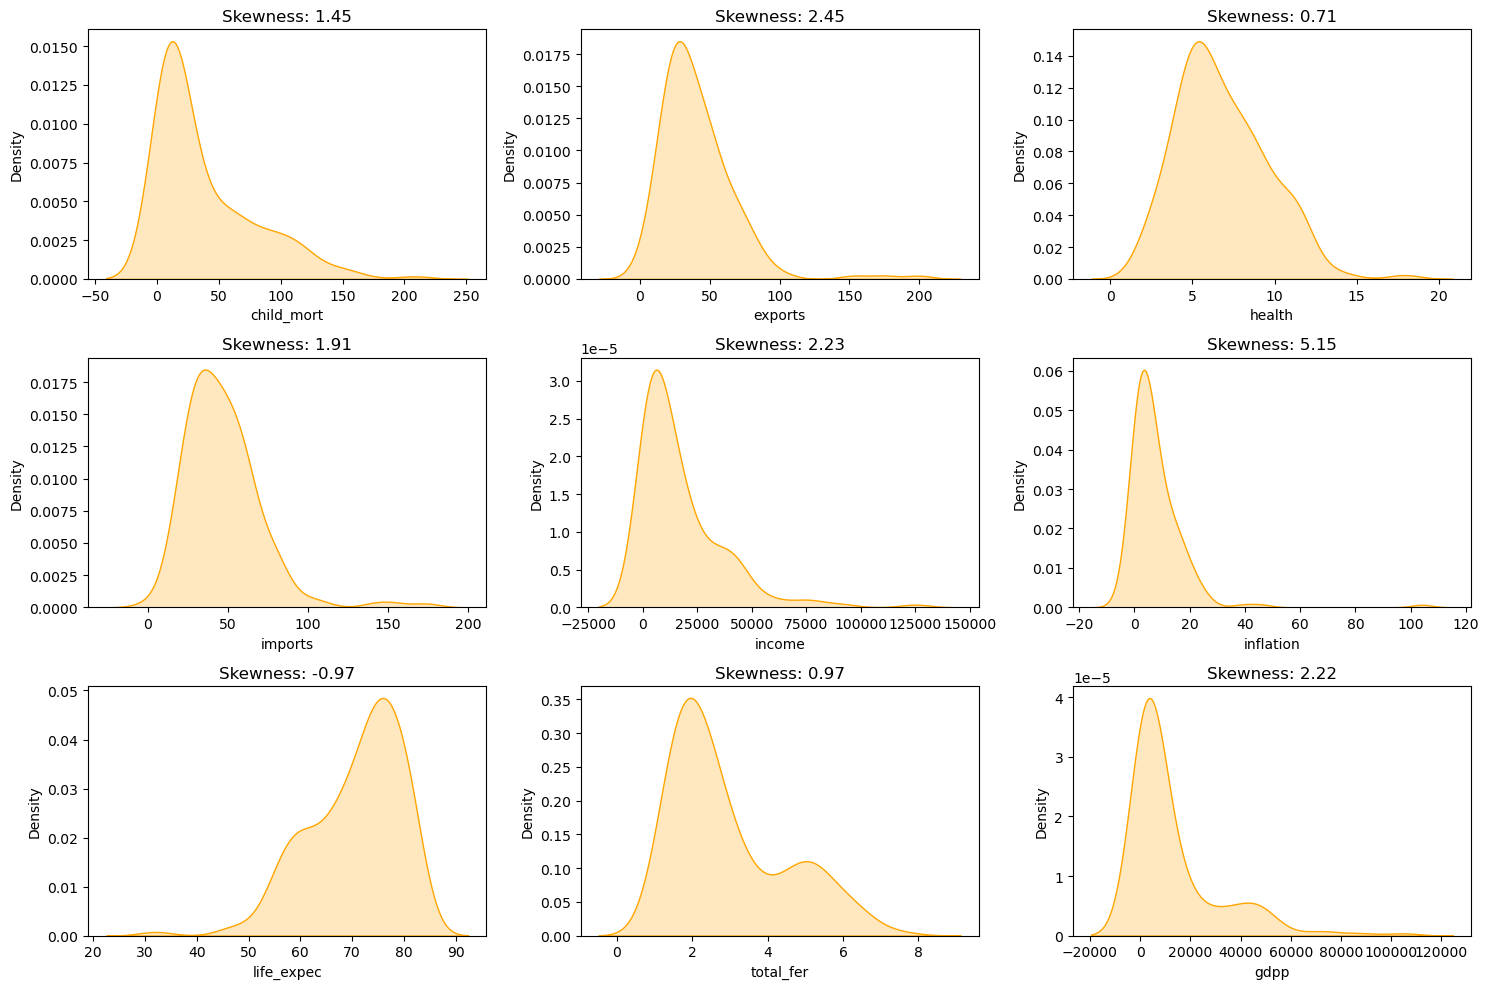

In [7]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data, x=i, fill=True, color='orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

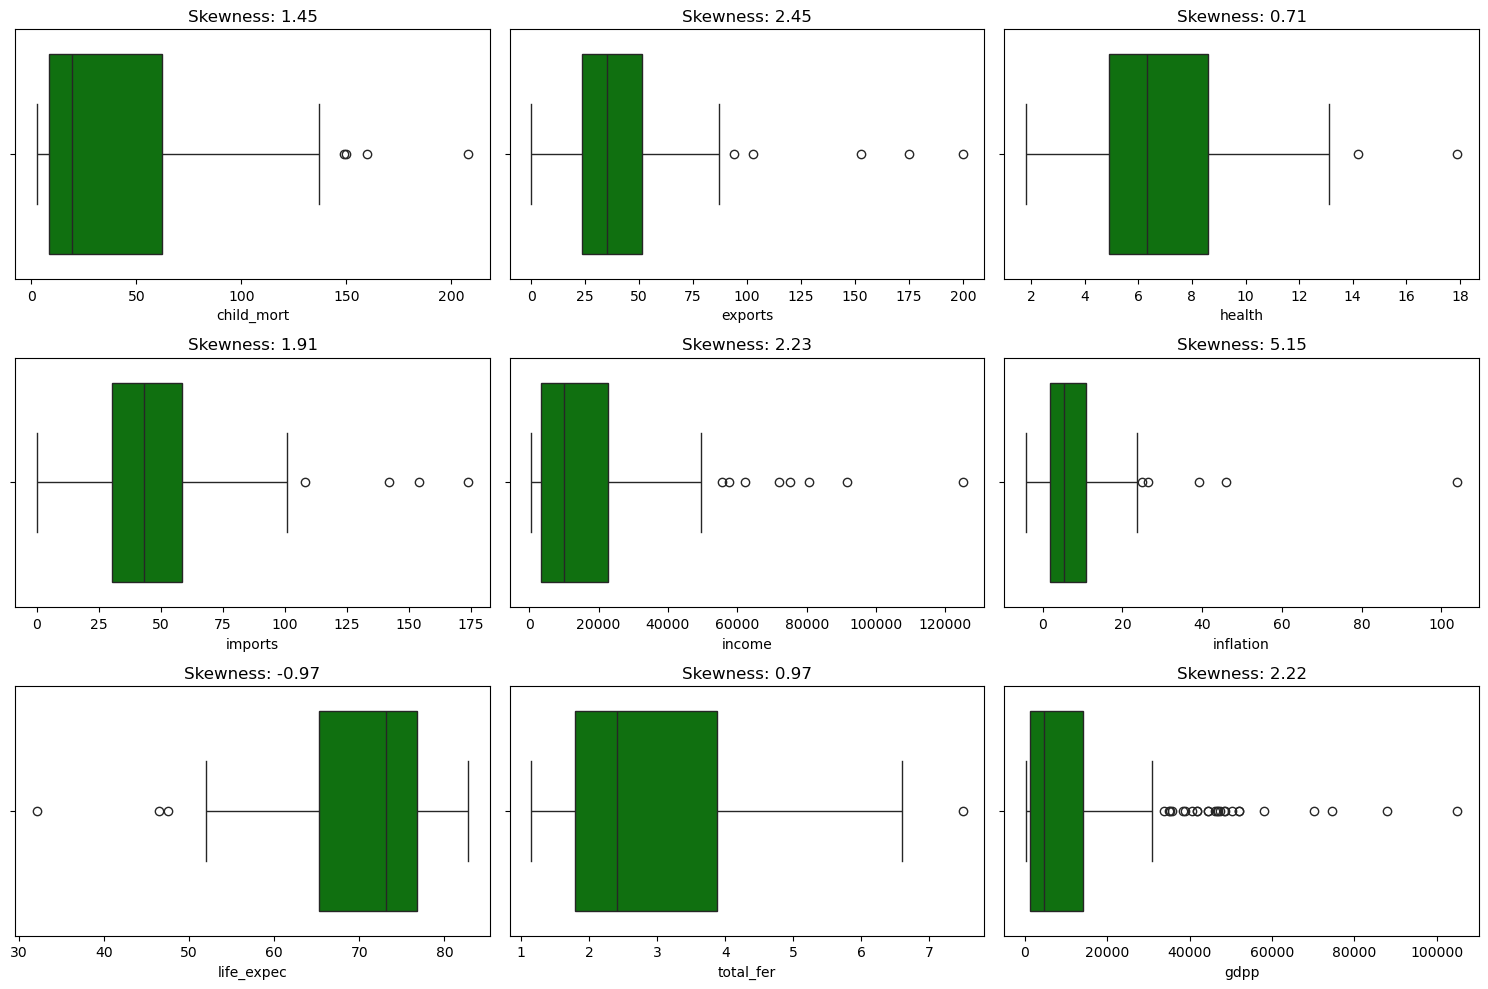

In [8]:
#Outlier visualization

t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data, x=i,color='green')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

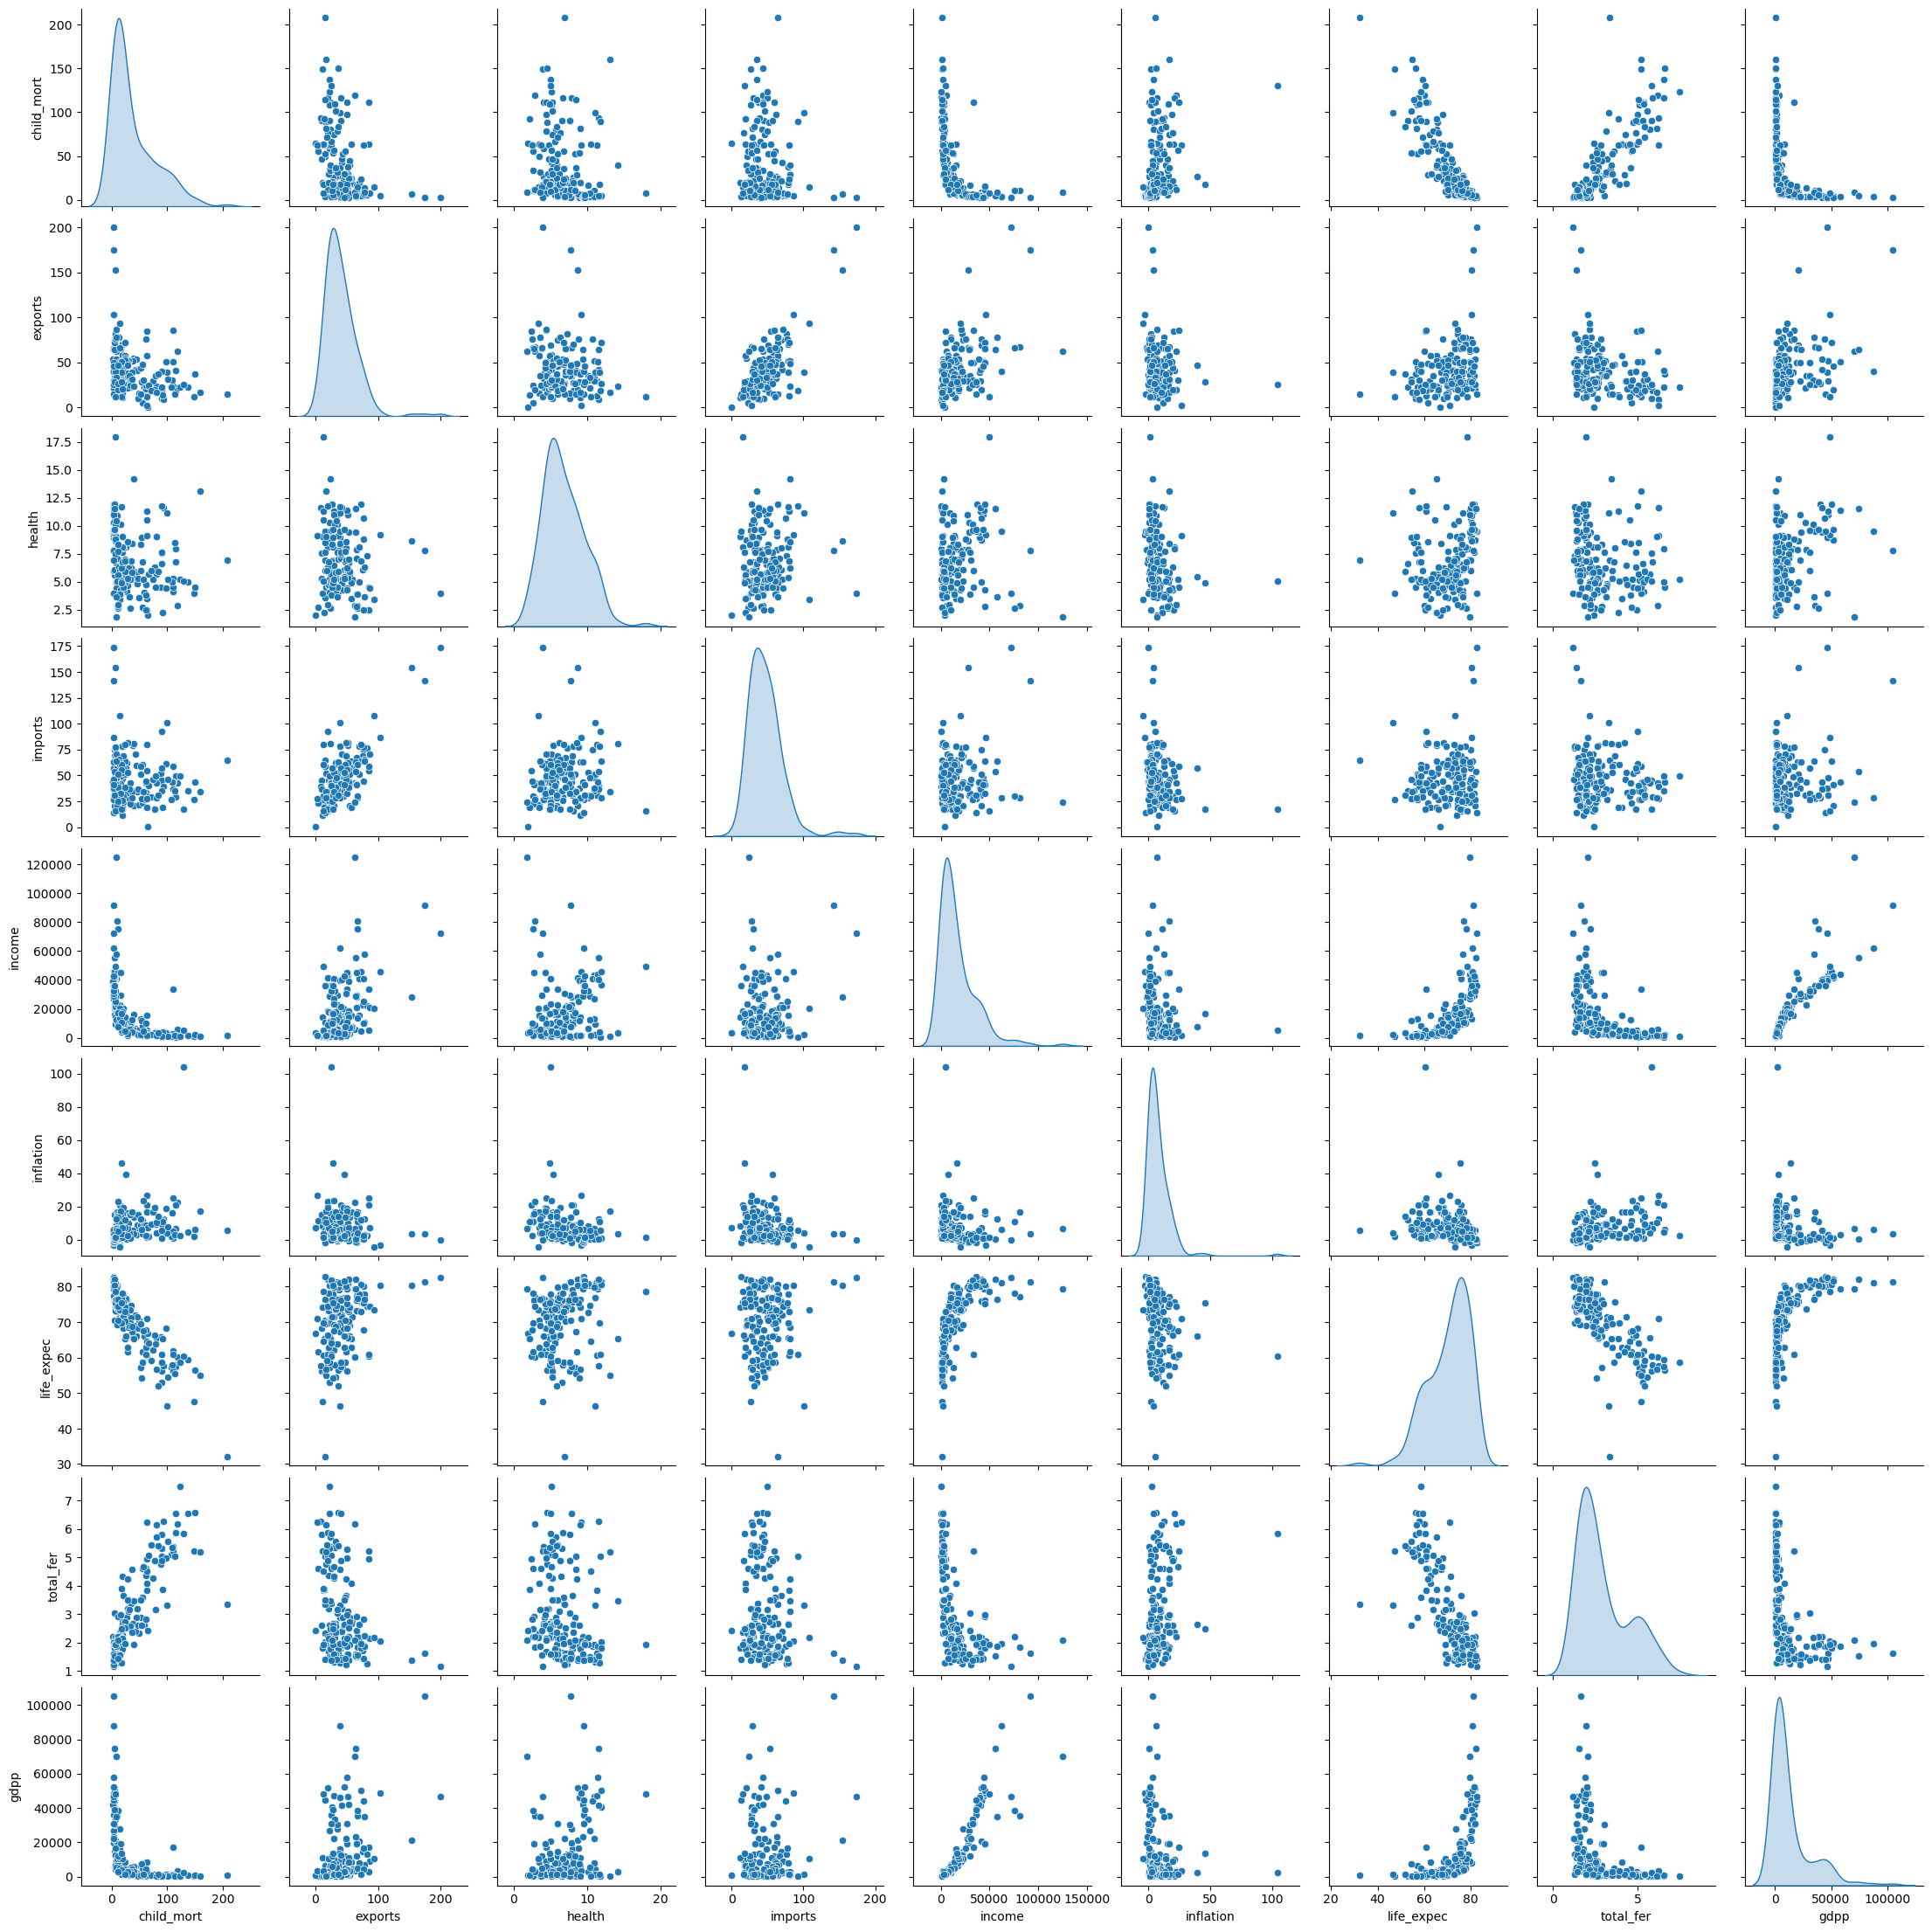

In [9]:
sns.pairplot(data, diag_kind='kde')
plt.show()

## Preprocessing

In [10]:
#Check for missing values
data.isnull().sum().sum()

#No missing values in the data

np.int64(0)

In [11]:
#Lets treat the extreme outliers
#We go with capping using iqr
#Whisker length= 2.5
for i in data.columns:
    q3,q1= data[i].quantile([0.75,0.25])
    iqr=q3-q1
    ul, ll= q3+2.5*iqr, q1-2.5*iqr
    data[i]= data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

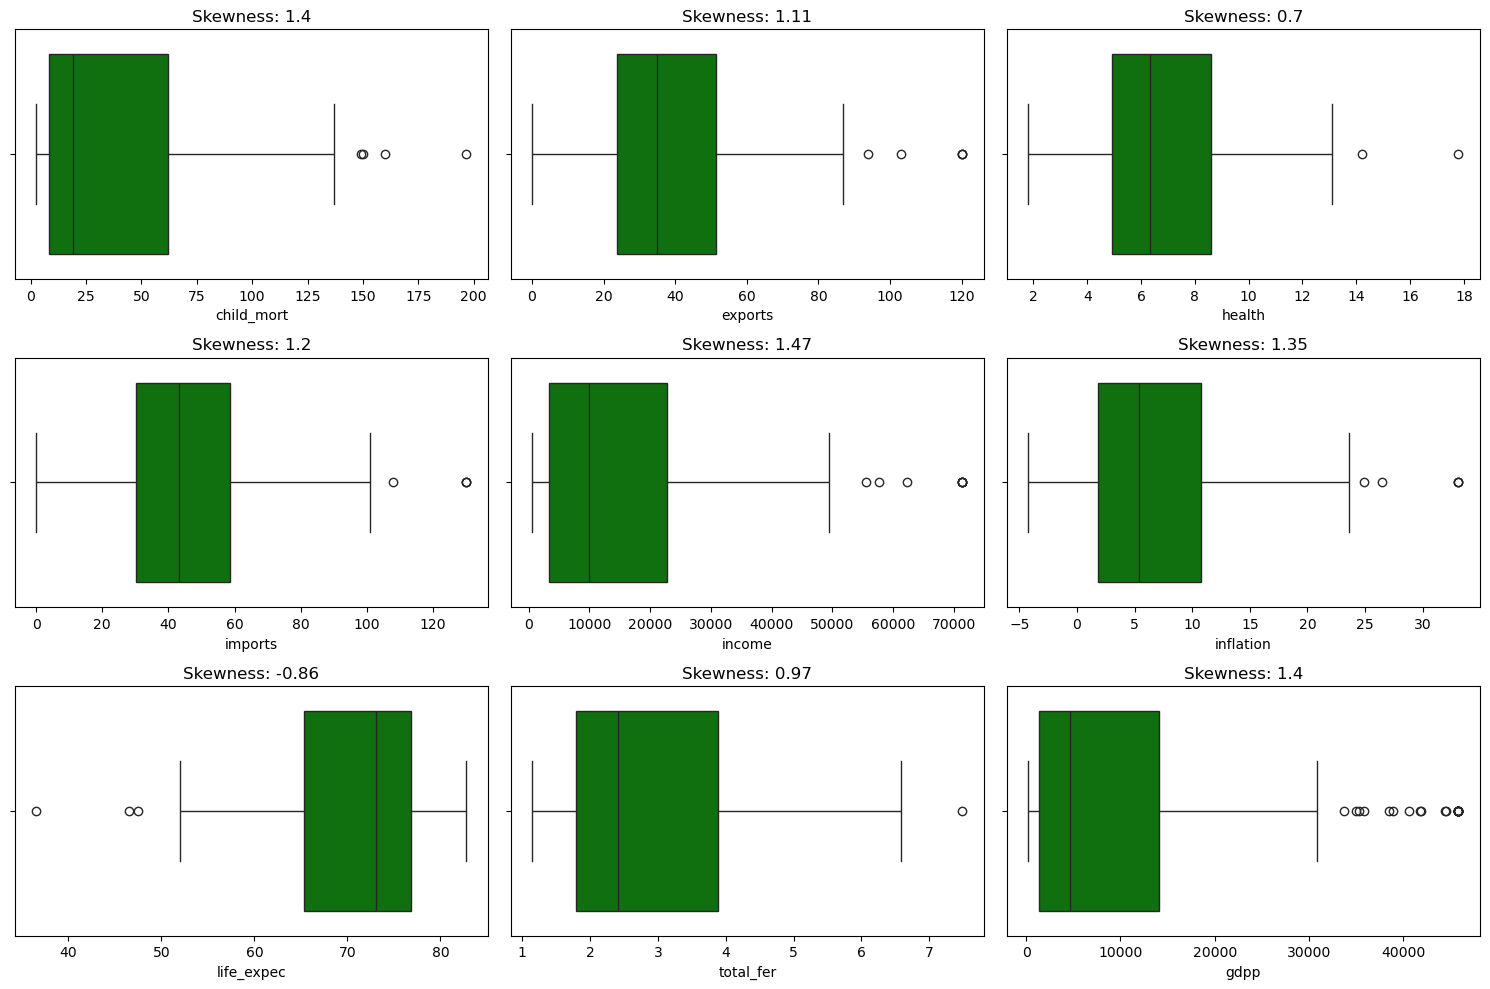

In [12]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data, x=i,color='green')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [13]:
#Lets apply PCA on the data before we proceed with clustering for better visualization and better clustering

In [14]:
#In PCA we need to pass standardized data, so we import the functions from libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [15]:
#Lets create an instance of scaling
scaler= StandardScaler()

#Also create an instance for PCA
pca= PCA(n_components=5, random_state=2)

#Lets create pipeline for the above two processes
pipeline=Pipeline([('Scale', scaler),
                   ('PCA',pca)])

In [16]:
pipeline.fit(data)

,steps,"[('Scale', ...), ('PCA', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'


In [17]:
pca.explained_variance_ratio_.cumsum()
#We are able to explain app. 95% variance at n_components=5, thus 9-dimension data can be reduced to 5-Dimensions

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [18]:
final_data= pipeline.transform(data)
final_data

array([[-3.04363665e+00, -2.01155292e-01,  9.51322351e-01,
         7.93444721e-01, -6.80001185e-03],
       [ 4.23415208e-01, -3.71462539e-01,  1.71749065e-01,
        -1.35358051e+00,  8.86229412e-02],
       [-4.04683884e-01, -4.40311949e-01, -1.63677511e+00,
        -5.73008378e-01,  3.97118511e-01],
       [-3.15006302e+00,  1.42528284e+00, -1.78498242e+00,
         1.58007124e+00,  1.42608744e-01],
       [ 1.14531297e+00,  3.92984506e-01,  1.51331589e-01,
        -8.23192552e-01, -3.70310799e-01],
       [-9.54170948e-02, -1.94085770e+00, -1.22199962e+00,
        -6.97940551e-03,  1.46093189e+00],
       [-1.77388617e-01, -4.27355752e-01, -5.02299598e-01,
        -1.52366162e+00, -7.48969680e-02],
       [ 2.60291028e+00, -2.23430488e+00,  1.85775655e-01,
         9.24552024e-01, -8.08426394e-01],
       [ 3.37172117e+00, -7.27160920e-01,  7.98543302e-01,
         1.21431820e+00, -2.41834808e-02],
       [-2.30117700e-01, -3.71196507e-01, -1.22883809e+00,
        -1.91571536e-01

In [19]:
final_data= pd.DataFrame(final_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
final_data.head(2)

,PC1,PC2,PC3,PC4,PC5
0,-3.043637,-0.201155,0.951322,0.793445,-0.006800
1,0.423415,-0.371463,0.171749,-1.353581,0.088623


## KMeans Clustering

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

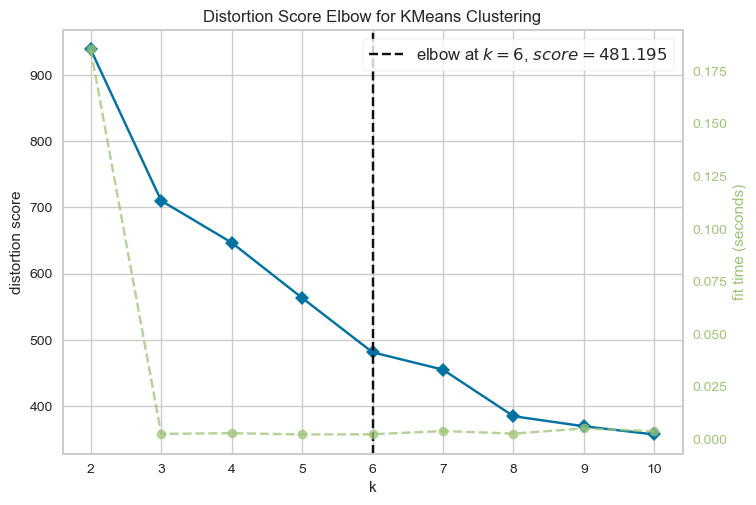

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
#Identify the value of k

#KElbow Visualizer:
kelbow= KElbowVisualizer(estimator=KMeans(random_state=2), k=10)
kelbow.fit(final_data)
kelbow.show()

* Although the above plot marks the elbow at k=6, but we can see a significant drop in distortion score from k=2 to k=3.
* As we increase the no. of clusters, it might become overfitted so let us explore silhouette visualizer to identify the correct or more generalized value of k

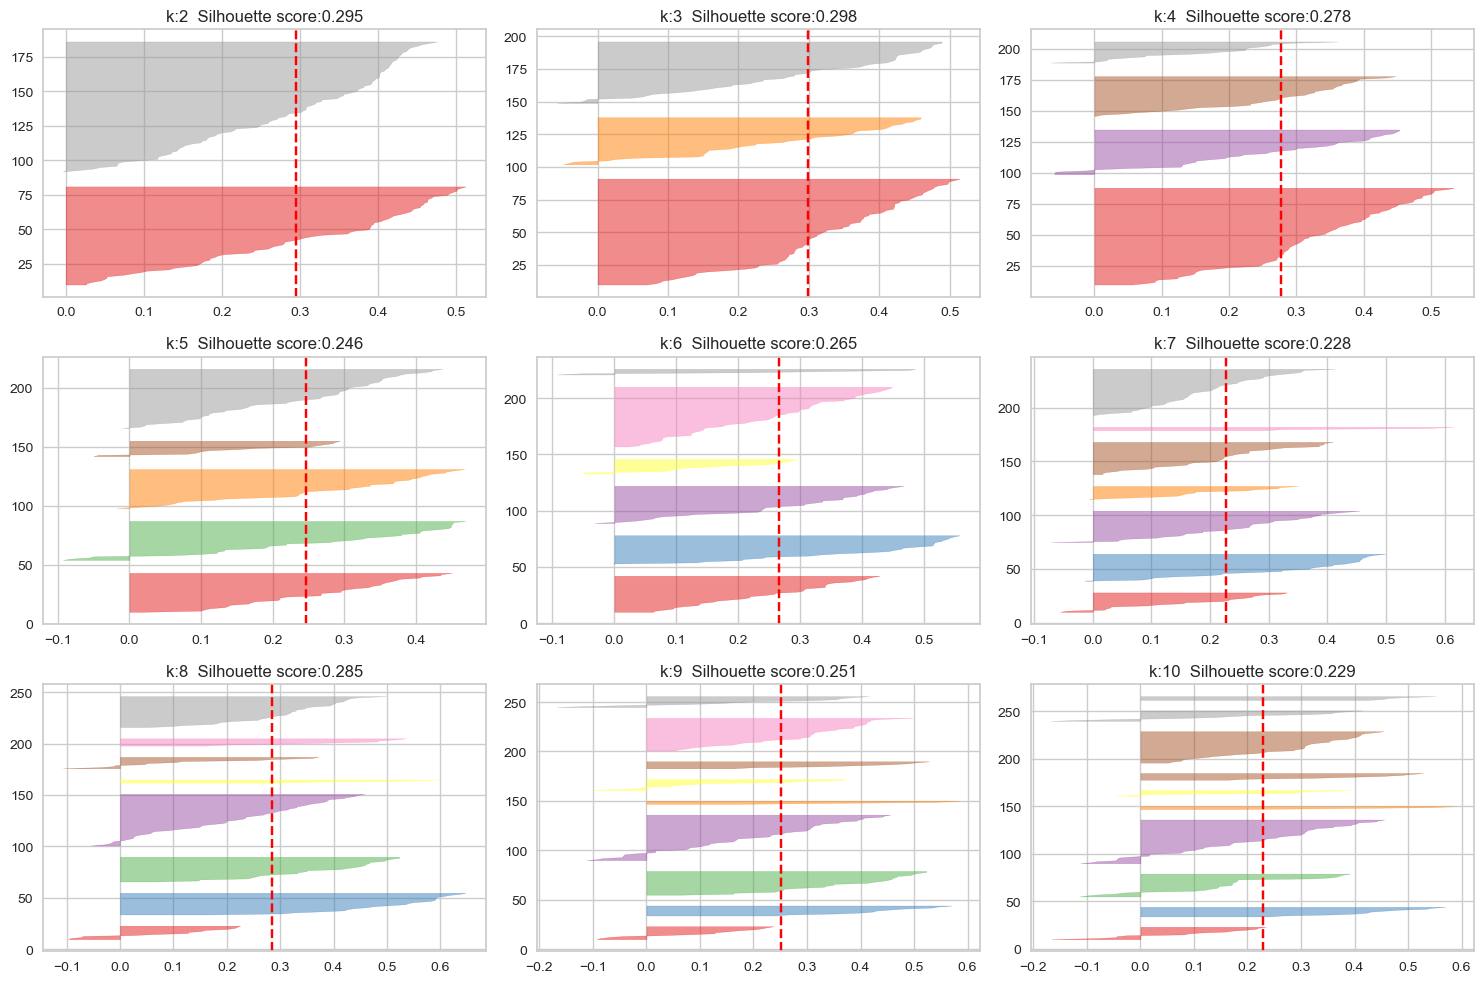

In [26]:
t=1
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k:{i}  Silhouette score:{round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

After analyzing the Elbow plot and Silhouette Visualizer we decide to go with K=3, Although there are few datapoints that are misclassified, but we see no drop in silhouette score and there is good enough data in every cluster.
Also we can see a significant drop in WCSS (distortion score) from k=2 to k=3 in KElbow plot.

In [28]:
final_kmeans= KMeans(n_clusters=3, random_state=2)

In [ ]:
labels= final_kmeans.fit_predict(final_data)

In [30]:
#Lets check Silhouette Score
print('Silhouette Score:', silhouette_score(final_data,labels))

Silhouette Score: 0.2984578234829661


In [31]:
#lets put these labels on PCA data
final_data['Labels']= labels
final_data.head(5)

,PC1,PC2,PC3,PC4,PC5,Labels
0,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
1,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
2,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
3,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
4,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


In [33]:
#Lets visualize the clusters
#In order to get the  best visualization, lets choose PC1 and PC2 as they have maximum variance

centroids= final_kmeans.cluster_centers_
centroids

array([[ 0.17875525,  0.05341484, -0.20504774, -0.75501774,  0.17891715],
       [ 2.84546398, -0.32884162,  0.1503381 ,  0.8430014 , -0.22073048],
       [-2.49875204,  0.16223172,  0.23440427,  0.6400084 , -0.13550372]])

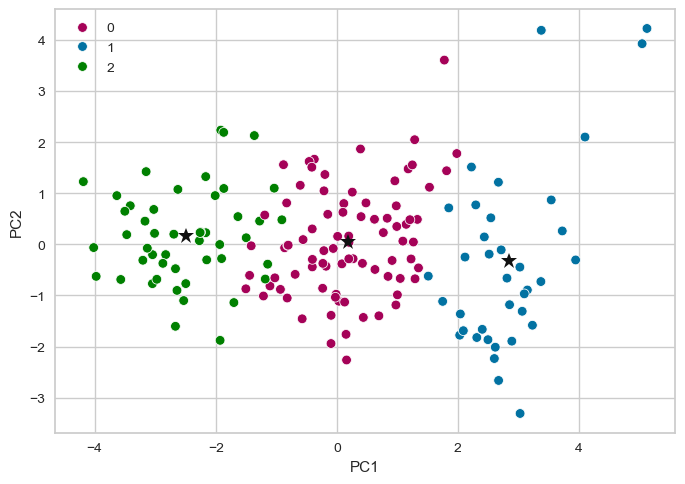

In [38]:
sns.scatterplot(final_data, x='PC1', y='PC2', palette=['m', 'b', 'green'], hue=labels)
for i in range(3):
    plt.plot(centroids[i][0], centroids[i][1], marker='*', ms=12, color='k')
plt.show()

## Business Interpretation

In [40]:
#For business understanding lets put the labels on original dataset
data['Label']= labels
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0


In [42]:
data.groupby(by='Label').mean().T

Label,0,1,2
child_mort,21.508537,5.237838,92.131771
exports,40.797317,53.575000,28.546229
health,6.231951,8.780270,6.296458
imports,48.097561,49.129054,41.443040
income,12281.097561,42690.878378,3937.770833
inflation,7.474744,2.588432,10.438854
life_expec,72.875610,79.956757,59.438542
total_fer,2.311707,1.755676,4.953958
gdpp,6291.146341,36905.405405,1902.916667


* After studying the data above, we can conclude that countries that have been assigned to cluster 2 can be called Underdeveloped.
* Cluster 1 has Developed countries
* The countries in cluster 0 are doing average in most of the factors but are stuggling in some economic factors like GDPP/Income, expenditure on Health. Hence they can be called developing.

In [43]:
data['Label']=data['Label'].map({0:'Developing', 1: 'Developed', 2: 'Underdeveloped'})

In [44]:
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing


In [45]:
#Developed countries
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [46]:
#Developing countries
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [47]:
#Underdeveloped countries
data[data['Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

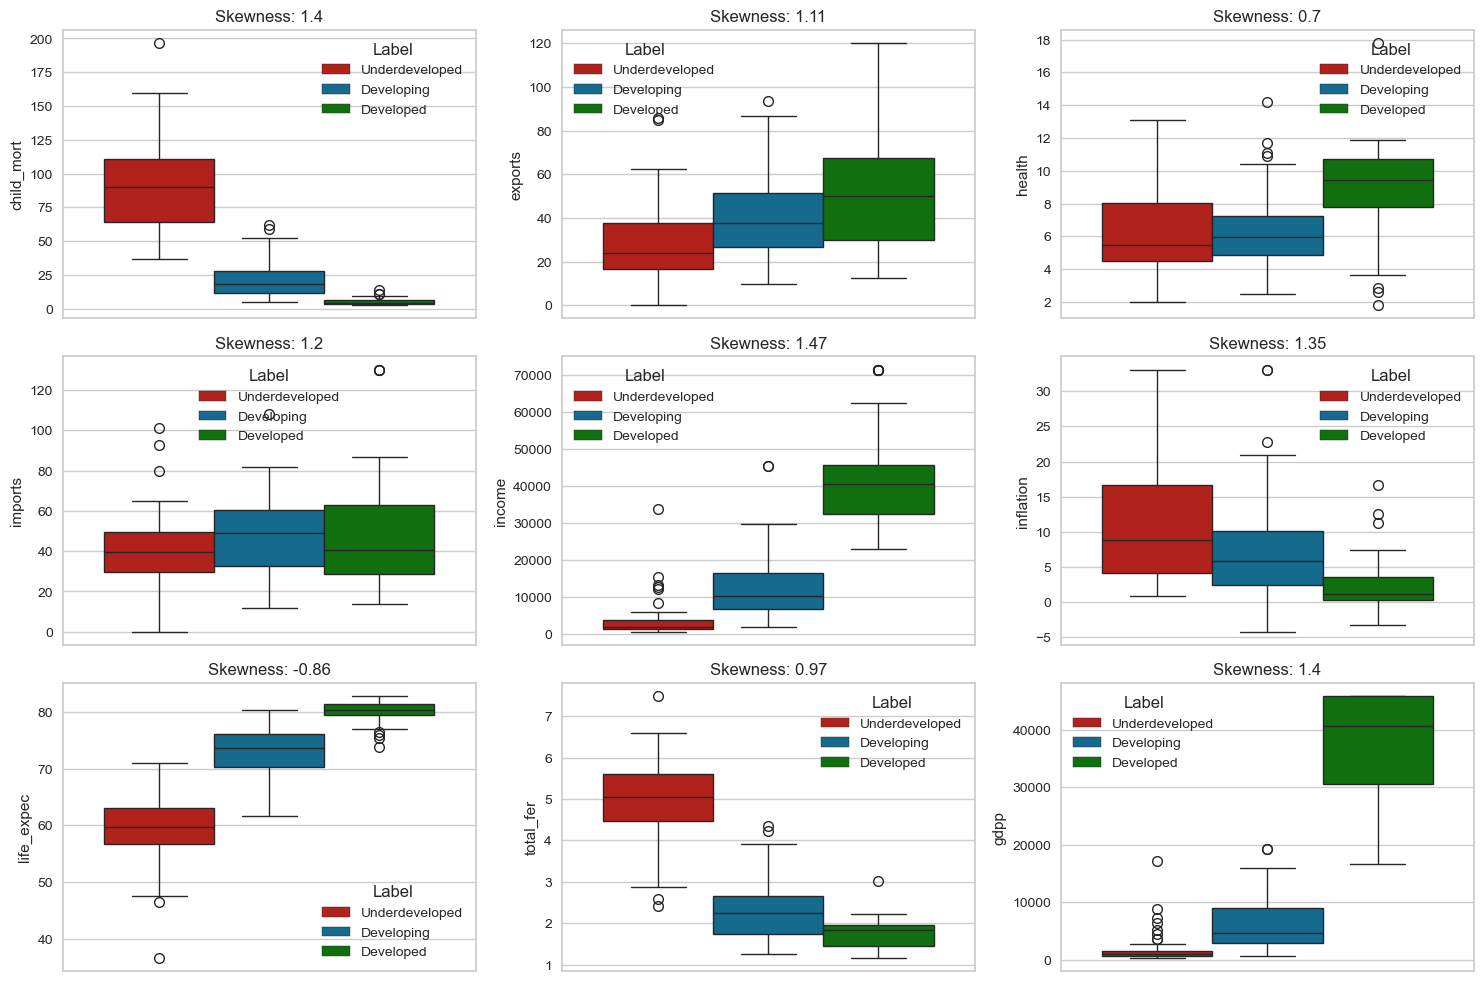

In [48]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    if i != 'Label':
        plt.subplot(3,3,t)
        sns.boxplot(data, y=i,hue='Label', palette=['r', 'b', 'green'])
        plt.title(f'Skewness: {round(data[i].skew(),2)}')
        t+=1
plt.tight_layout()
plt.show()

In [ ]:
#Lets import the libary with advanced charts
import plotly.express as px

In [54]:
#WorldMap
px.choropleth(data_frame=data, locationmode='country names', locations=data.index, color='Label',
              color_discrete_map={'Underdeveloped': 'red', 'Developing': 'blue', 'Developed':'green'})